# Melanoma Detection

This is an attempt to differentiate between three types of skin lesions, melanoma, nevi and seborrheic keratosesone. Melanoma is cancerous; the other three are benign.

The data and objective are from the [ISIC 2017: Skin Lesion Analysis Towards Melanoma Detection](https://challenge.kitware.com/#challenge/583f126bcad3a51cc66c8d9a), as presented in the [udacity/dermatologist-ai](https://github.com/udacity/dermatologist-ai) repository. I used same [train](https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/skin-cancer/train.zip), [vaidation](https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/skin-cancer/valid.zip) and [test](https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/skin-cancer/test.zip) data hosted by Udacity.

I originally worked on the problem in the [Udacity Deep Learning Nanodegree](https://www.udacity.com/course/deep-learning-nanodegree--nd101) program. I wanted to revisit the problem using the [fastai](https://github.com/fastai/fastai) library.


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
np.random.seed(303)

## Load and view data

In [4]:
datapath = Path('../data/melanoma-detection').resolve() # absolute path to data
!ls $datapath

models	test  train  valid


In [5]:
bs=64

In [6]:
# # speed processing by reducing image size to max dimension of 300px
# # NB this overwrites original images!
# for dtype in ['test', 'train', 'valid']:
#     for dclass in ['melanoma', 'nevus', 'seborrheic_keratosis']:
#         path = datapath / dtype / dclass
#         print(dtype, dclass)
#         verify_images(path, max_size=300)

In [7]:
tfms = get_transforms(flip_vert=True) # add vertical flip, since these are top down

## Learn

In [69]:
data = ImageDataBunch.from_folder(datapath, ds_tfms=tfms, bs=bs, size=64, num_workers=4).normalize(imagenet_stats)

In [70]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


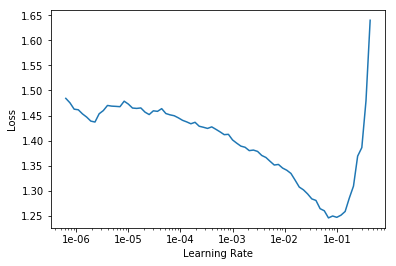

In [71]:
learn.lr_find()
learn.recorder.plot()

In [72]:
learn.fit_one_cycle(8, max_lr=1e-2)

epoch,train_loss,valid_loss,error_rate
1,1.261514,1.248207,0.420000
2,0.987605,0.980070,0.380000
3,0.848920,0.846316,0.333333
4,0.768346,0.793369,0.366667
5,0.712857,0.712214,0.286667
6,0.656592,0.652494,0.273333
7,0.612515,0.652534,0.260000
8,0.580116,0.651985,0.253333


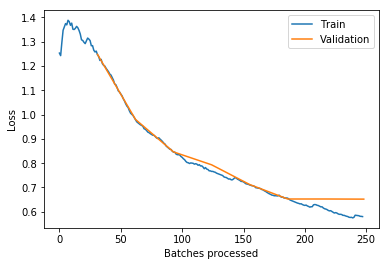

In [73]:
learn.recorder.plot_losses()

In [74]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,error_rate
1,0.543567,0.696686,0.286667
2,0.554910,0.616596,0.233333
3,0.538559,0.642227,0.260000
4,0.512902,0.633143,0.266667


In [76]:
learn.freeze()
learn.save('res50-64')

In [92]:
# learn.load('res50-64')
# learn.freeze()

In [93]:
data = ImageDataBunch.from_folder(datapath, ds_tfms=tfms, bs=bs, size=128, num_workers=4).normalize(imagenet_stats)
learn.data = data

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


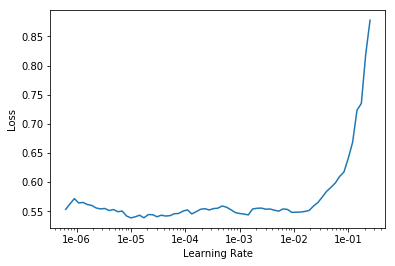

In [94]:
learn.lr_find()
learn.recorder.plot()

In [95]:
learn.fit_one_cycle(8, max_lr=3e-3)

epoch,train_loss,valid_loss,error_rate
1,0.576713,0.669289,0.240000
2,0.545440,0.631304,0.206667
3,0.538211,0.630330,0.260000
4,0.517996,0.558248,0.213333
5,0.491670,0.648938,0.280000
6,0.466583,0.539989,0.206667
7,0.441833,0.550172,0.206667
8,0.419098,0.550354,0.213333


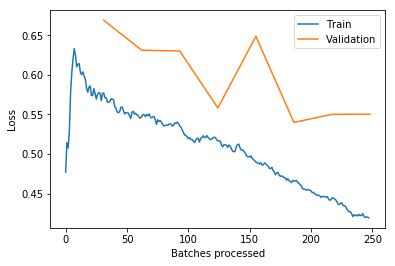

In [96]:
learn.recorder.plot_losses()

In [97]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(3e-6, 3e-4))

epoch,train_loss,valid_loss,error_rate
1,0.372402,0.563862,0.206667
2,0.380063,0.569588,0.220000
3,0.371645,0.540385,0.180000
4,0.360910,0.512993,0.186667


In [98]:
learn.freeze()
learn.save('res50-128')

In [104]:
# learn.load('res50-128')
# learn.freeze()

In [105]:
data = ImageDataBunch.from_folder(datapath, ds_tfms=tfms, bs=bs // 2, size=256, num_workers=4).normalize(imagenet_stats)
learn.data = data

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


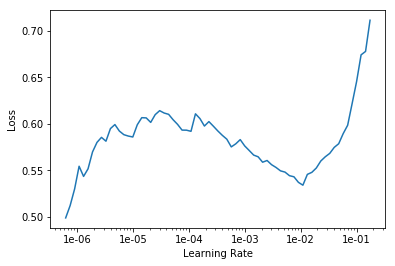

In [106]:
learn.lr_find()
learn.recorder.plot()

In [107]:
learn.fit_one_cycle(8, max_lr=1e-3)

epoch,train_loss,valid_loss,error_rate
1,0.535234,0.603554,0.240000
2,0.498511,0.592355,0.253333
3,0.508666,0.472343,0.213333
4,0.471834,0.545388,0.220000
5,0.440670,0.506881,0.206667
6,0.415652,0.493748,0.220000
7,0.399755,0.494987,0.220000
8,0.393345,0.504029,0.213333


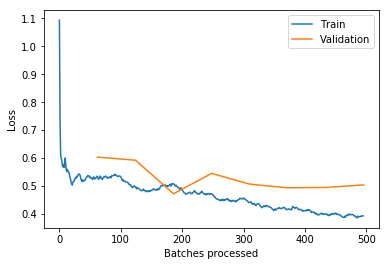

In [108]:
learn.recorder.plot_losses()

In [109]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.388751,0.492073,0.206667
2,0.373145,0.491039,0.206667
3,0.360414,0.499671,0.213333
4,0.365199,0.492475,0.213333


In [110]:
learn.freeze()
learn.save('res50-256')

### Results

In [111]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()
len(data.valid_ds) == len(losses) == len(idxs)

True

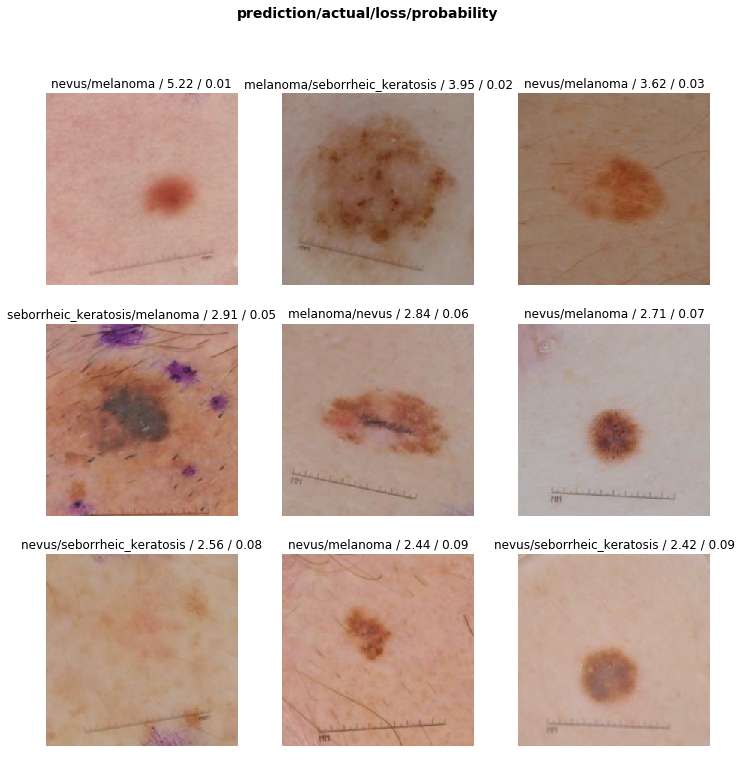

In [112]:
interp.plot_top_losses(9, figsize=(12, 12))

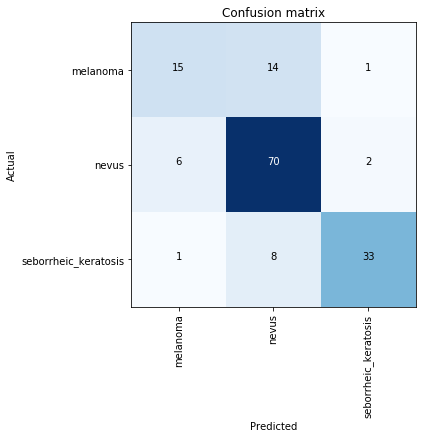

In [113]:
interp.plot_confusion_matrix(figsize=(6, 6))